[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pwd

path


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Question 0: Import the dataset Dataset

In [4]:
path= '/Users/success-vera/Downloads/AMMI/diabetes.csv'
data= pd.read_csv(path,encoding='latin-1')


Question 1: Print the first five rows of the Dataset

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Question 3: Describe your dataset

In [7]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.shape

(768, 9)

Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [9]:
def standard_scale(x):
    data_scaled=(x-np.mean(x,axis=0))/np.std(x,axis=0)
    return data_scaled


Question 5: Scale your features, except the target. 

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.iloc[:,:-1] = standard_scale(data)

In [12]:
data.describe() #check the description of the data after scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-7.748432e-17,3.614007e-18,-1.327244e-17,7.762888e-17,-5.493291e-17,2.972738e-15,1.924387e-15,1.950118e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


We see that the mean is tending towards 0 and the standard deviation is tending towards 1.

Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [13]:
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values


In [14]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [15]:
class logistic_regression:
    def __init__(self,x_test,y_test,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.0001):
        self.num_iters=num_iters
        self.threshold=threshold
        self.tolerance=tolerance
        self.learning_rate = learning_rate
        self.theta=None
        self.cost_history=[]
        self.cost_history_test=[]
        self.x_test=x_test
        self.y_test=y_test

    def add_ones(self, x):
        x_new= np.concatenate((np.ones((len(x),1)),x),axis=1)
        return x_new

    def sigmoid(self, x, theta):
        z= x @ theta 
        sigmoid=1/(1+np.exp(-z))
        return sigmoid

    def cross_entropy(self, x, y_true):
        n = len(x) 
        y_pred = self.sigmoid(x,self.theta)
        cost = -np.sum(y_true.reshape(-1,1)*np.log(y_pred.reshape(-1,1))+(1-y_true.reshape(-1,1))*np.log(1-y_pred.reshape(-1,1)))
        return cost/n 

    def fit(self, x,y):
        x= self.add_ones(x) 
        y= y.reshape(-1,1) 
        self.theta= np.zeros((x.shape[1],1)) 
        current_iter= 1
        norm= 1

        while (norm >= self.tolerance and current_iter < self.num_iters):
            theta_old = self.theta.copy() 


          # make predictions
            y_pred= self.sigmoid(x,self.theta) # using sigmoid function 
#             print('pred: ',y_pred)
              # Gradient of cross-entropy
            grad= -x.T@(y.reshape(-1,1)-y_pred.reshape(-1,1))
            grad= grad.reshape(-1,1) 
#             print('Grad: ',grad)

              # update rules
            self.theta=self.theta-(self.learning_rate*grad)
              # Compute the training loss & test loss
            self.cost_history.append((self.cross_entropy(x,y.reshape(-1,1))))
            self.cost_history_test.append((self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1))))


              # Convergence criteria:
            if current_iter%100 == 0:
#                 print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
                norm = np.linalg.norm(theta_old - self.theta)
            current_iter += 1
    def predict(self, x):
        proba= self.predict_proba(x) # Get probability of x
        result= [0 if proba < 0.5 else 1 for proba in proba]  # Convert proba to 0 or 1. hint: list comprehension
        return  result

    def predict_proba(self, x):
        x= self.add_ones(x) # Apply add ones to x
        y_pred_prob= self.sigmoid(x,self.theta) # Predict proba with sigmoid
        return y_pred_prob

    def plot(self):
        plt.plot(self.cost_history,label='Train Loss')
        plt.plot(self.cost_history_test,label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Log Regression")
        plt.show()
    

In [16]:
model = logistic_regression(x_test=x_test,y_test=y_test,num_iters=500)
model.fit(x_train, y_train) 

In [17]:
%%time
model.fit(x_train, y_train)

CPU times: user 56.6 ms, sys: 2.07 ms, total: 58.7 ms
Wall time: 59.7 ms


In [18]:
pred= model.predict(x_test)
model.predict(x_test)

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
# Predict Proba
# print(model.predict_proba(x_test))

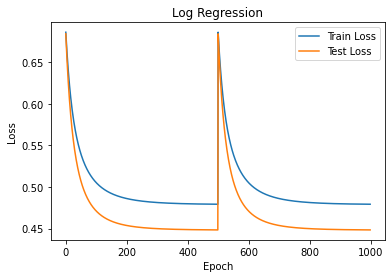

In [20]:
model.plot()

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [21]:
class logistic_regression_l1(logistic_regression):
    def __init__(self,x_test,y_test,l1=0.4,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001):
        super().__init__(x_test,y_test,num_iters, threshold, tolerance= 1e-10, learning_rate= 0.00001)
        self.l1=l1
        
    def cross_entropy(self, x, y_true):
        n = len(x) 
        y_pred = self.sigmoid(x,self.theta)
        cost = -np.sum(y_true.reshape(-1,1)*np.log(y_pred.reshape(-1,1))+(1-y_true.reshape(-1,1))*np.log(1-y_pred.reshape(-1,1)))+np.linalg.norm(self.theta,ord=1)*self.l1

        return cost/n

    def fit(self, x,y,batch_size=32):
        x= self.add_ones(x)
        y= y.reshape(-1,1) 
        self.theta= np.zeros((x.shape[1],1)) 
        current_iter= 1
        norm= 1

        while (norm >= self.tolerance and current_iter < self.num_iters):
            theta_old = self.theta.copy() # Get old theta
            train_losses = []
            test_losses = []
            
            np.random.seed(3)
            perm=np.random.permutation(len(x))
            x=x[perm]
            y=y[perm]
            number_of_batches = (x.shape[0]) // batch_size
            epoch_losses=[]
            for batch_number in range(number_of_batches):
                x_train = x[batch_number * batch_size: (batch_number + 1) * batch_size]
                y_train = y[batch_number * batch_size: (batch_number + 1) * batch_size]


                y_pred= self.sigmoid(x_train,self.theta) # using sigmoid function 

                  # Gradient of cross-entropy
                grad= -x_train.T@(y_train.reshape(-1,1)-y_pred.reshape(-1,1))+np.sign(self.theta)*self.l1
                grad= grad.reshape(-1,1) # Reshape, if it is needed
#                 print('Grad: ',grad)
                  # update rules
                self.theta=self.theta-(self.learning_rate*grad)
                  # Compute the training loss
                epoch_loss=(self.cross_entropy(x_train,y_train.reshape(-1,1)))
                epoch_losses.append(epoch_loss)
            self.cost_history.append(np.mean(epoch_losses))
            self.cost_history_test.append((self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1))))


          # Convergence criteria:
            if current_iter%100 == 0:
#                 print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
                norm = np.linalg.norm(theta_old - self.theta)
            current_iter += 1
    def plot(self):
        plt.plot(self.cost_history,label='Train Loss')
        plt.plot(self.cost_history_test,label="Test Loss")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Lasso Regularization")
        plt.show()



In [22]:
model_l1 = logistic_regression_l1(x_test=x_test,y_test=y_test,num_iters=10000)
model_l1.fit(x_train, y_train)

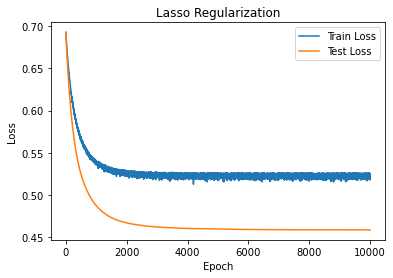

In [23]:
model_l1.plot()

In [24]:
    
class logistic_regression_l2(logistic_regression):
    def __init__(self,x_test,y_test,l2=0.4,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.0001):
        super().__init__(x_test,y_test,num_iters, threshold, tolerance= 1e-10, learning_rate= 0.0001)
        self.l2=l2
        
    def cross_entropy(self, x, y_true):
        n = len(x) # Length of x
        y_pred = self.sigmoid(x,self.theta)
        cost = -np.sum(y_true.reshape(-1,1)*np.log(y_pred.reshape(-1,1))+(1-y_true.reshape(-1,1))*np.log(1-y_pred.reshape(-1,1)))+np.linalg.norm(self.theta,ord=2)*self.l2
        return cost/n

    def fit(self, x,y,batch_size=32):
        x= self.add_ones(x)
        y= y.reshape(-1,1) 
        self.theta= np.zeros((x.shape[1],1)) 
        current_iter= 1
        norm= 1

        while (norm >= self.tolerance and current_iter < self.num_iters):
            theta_old = self.theta.copy() # Get old theta
            train_losses = []
            test_losses = []
            
            np.random.seed(2022)
            perm=np.random.permutation(len(x))
            x=x[perm]
            y=y[perm]

            number_of_batches = (x.shape[0]) // batch_size
            epoch_losses=[]
            for batch_number in range(number_of_batches):
                x_train = x[batch_number * batch_size: (batch_number + 1) * batch_size]
                y_train = y[batch_number * batch_size: (batch_number + 1) * batch_size]

                y_pred= self.sigmoid(x_train,self.theta) 

                  # Gradient of cross-entropy
                grad= -x_train.T@(y_train.reshape(-1,1)-y_pred.reshape(-1,1))+(self.theta)*(self.l2**2)
                grad= grad.reshape(-1,1) # Reshape, if it is needed
   
                self.theta=self.theta-(self.learning_rate*grad)
                  # Compute the training loss
                epoch_loss=(self.cross_entropy(x_train,y_train.reshape(-1,1)))
                epoch_losses.append(epoch_loss)
            self.cost_history.append(np.mean(epoch_losses))
            self.cost_history_test.append((self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1))))


          # Convergence criteria:
            if current_iter%100 == 0:
#                 print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
                norm = np.linalg.norm(theta_old - self.theta)
            current_iter += 1
    def plot(self):
        plt.plot(self.cost_history,label='Train Loss')
        plt.plot(self.cost_history_test,label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Ridge Regularization")
        plt.show()
      

In [25]:
model_l2 = logistic_regression_l2(x_test=x_test,y_test=y_test,num_iters=10000)
model_l2.fit(x_train, y_train)

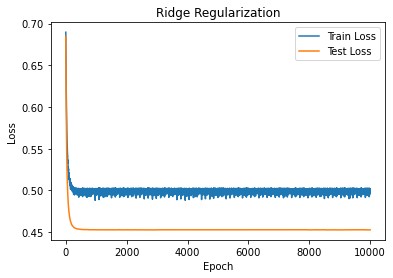

In [26]:
model_l2.plot()

In [27]:
class logregression_regularized(logistic_regression):
    def __init__(self,x_test,y_test,l1=0.4,l2=0.4,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001):
        super().__init__(x_test,y_test,num_iters, threshold, tolerance= 1e-10, learning_rate= 0.00001)
        self.l1=l1
        self.l2=l2
        
    def cross_entropy(self, x, y_true):
        n = len(x) # Length of x
        y_pred = self.sigmoid(x,self.theta)
        cost = -np.sum(y_true.reshape(-1,1)*np.log(y_pred.reshape(-1,1))+(1-y_true.reshape(-1,1))*np.log(1-y_pred.reshape(-1,1)))+np.linalg.norm(self.theta,ord=1)*self.l1+np.linalg.norm(self.theta,ord=2)*self.l2

        return cost/n

    def fit(self, x,y,batch_size=32):
        x= self.add_ones(x)
        y= y.reshape(-1,1) 
        self.theta= np.zeros((x.shape[1],1)) 
        current_iter= 1
        norm= 1

        while (norm >= self.tolerance and current_iter < self.num_iters):
            theta_old = self.theta.copy() # Get old theta
            train_losses = []
            test_losses = []
            
            np.random.seed(2022)
            perm=np.random.permutation(len(x))
            x=x[perm]
            y=y[perm]
            number_of_batches = (x.shape[0]) // batch_size
            epoch_losses=[]
            for batch_number in range(number_of_batches):
                x_train = x[batch_number * batch_size: (batch_number + 1) * batch_size]
                y_train = y[batch_number * batch_size: (batch_number + 1) * batch_size]
                y_pred= self.sigmoid(x_train,self.theta) 

                  # Gradient of cross-entropy
                grad= -x_train.T@(y_train.reshape(-1,1)-y_pred.reshape(-1,1))+np.sign(self.theta)*self.l1+(self.theta)*(self.l2**2)
                grad= grad.reshape(-1,1)
                
                  # update rules
                self.theta=self.theta-(self.learning_rate*grad)
                
                  # Compute the training loss
                epoch_loss=(self.cross_entropy(x_train,y_train.reshape(-1,1)))
                epoch_losses.append(epoch_loss)
            self.cost_history.append(np.mean(epoch_losses))
            self.cost_history_test.append((self.cross_entropy(self.add_ones(x_test),y_test.reshape(-1,1))))


          # Convergence criteria:
            if current_iter%100 == 0:
#                 print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
                norm = np.linalg.norm(theta_old - self.theta)
            current_iter += 1
    def plot(self):
        plt.plot(self.cost_history,label='Train Loss')
        plt.plot(self.cost_history_test,label="Test Loss")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Elastic Net")
        plt.show()



In [28]:
model_l1_l2 = logregression_regularized(x_test=x_test,y_test=y_test,num_iters=10000)
model_l1_l2.fit(x_train, y_train)

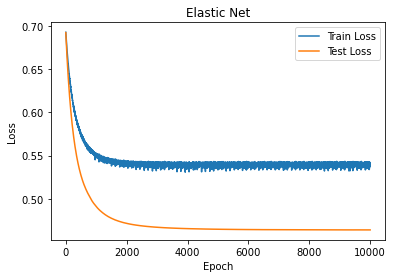

In [29]:
model_l1_l2.plot()

# Results Interpretation

Here, we keep all the parameters constant and vary the norms.

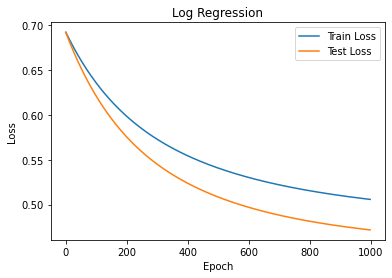

In [39]:
model = logistic_regression(x_test=x_test,y_test=y_test,threshold= 0.5, tolerance= 1e-10,num_iters=1000,learning_rate= 0.00001)
model.fit(x_train, y_train) 
model.plot()

Without any norm, we have the train loss decreasing till about 0.51 whilt the test loss decresased to about 0.42.

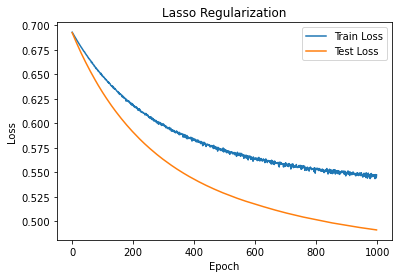

In [45]:
l1=logistic_regression_l1(x_test,y_test,l1=0.5,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l1.fit(x_train,y_train)
l1.plot()

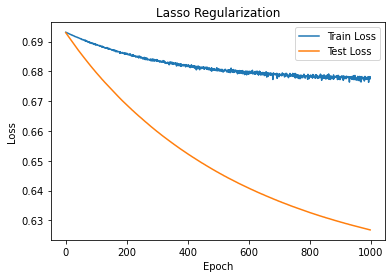

In [46]:
l1_=logistic_regression_l1(x_test,y_test,l1=4,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l1_.fit(x_train,y_train)
l1_.plot()

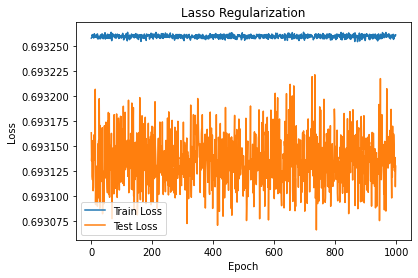

In [47]:
l1__=logistic_regression_l1(x_test,y_test,l1=10,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l1__.fit(x_train,y_train)
l1__.plot()

With lambda_1 = 0.5, we have test loss = 0.5, train loss = 0.57. The train and test losses are decreasing steadily.

With lambda_1 = 4, we have test loss = 0.63, train loss = 0.68. However, the loss gets very wide despite starting very small.

With lambda_1 = 10, we have that the test and train losses seem to have no relationship, even resulting to a stochastic test loss.

From the plots, it is better to use a small lambda 1.

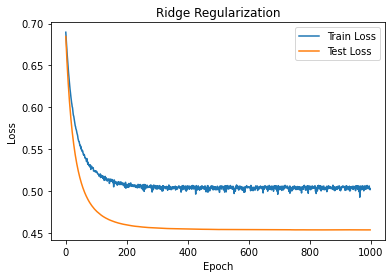

In [48]:
l2=logistic_regression_l2(x_test,y_test,l2=0.5,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.0001)
l2.fit(x_train,y_train)
l2.plot()

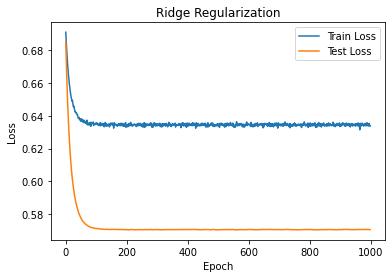

In [49]:
l2_=logistic_regression_l2(x_test,y_test,l2=4,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.0001)
l2_.fit(x_train,y_train)
l2_.plot()

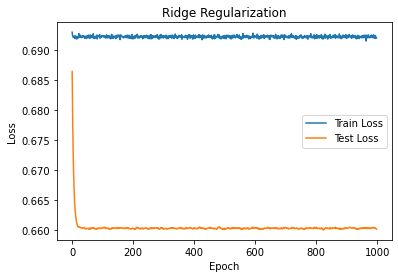

In [50]:
l2__=logistic_regression_l2(x_test,y_test,l2=10,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.0001)
l2__.fit(x_train,y_train)
l2__.plot()

With lambda_2 = 0.5, we have ending test loss = 0.45, ending train loss = 0.51. The train and test losses are decreasing steadily.

With lambda_2 = 4, we have ending test loss = 0.56, ending train loss = 0.64. However, the loss gets very wide despite starting very small.

With lambda_1 = 10, we have that the test and train losses seem to have no relationship. Also, the train loss did not change while the test loss fell from a high value to a low values rather sharply.

From the plots, it is better to use a small lambda 2. Also, in all the loss of the test decreases.

In comparison between l1 and l2, we see that the loss in l2 is generally smaller than that of l1. 

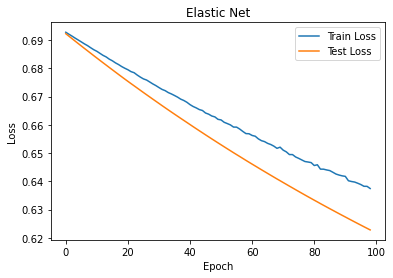

In [62]:
l3=logregression_regularized(x_test,y_test,l1=0.0004,l2=0.0004,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l3.fit(x_train, y_train)
l3.plot()

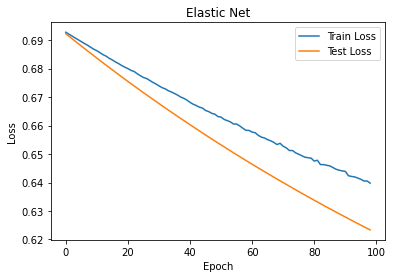

In [63]:
l3_=logregression_regularized(x_test,y_test,l1=0.0004,l2=0.4,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l3_.fit(x_train, y_train)
l3_.plot()

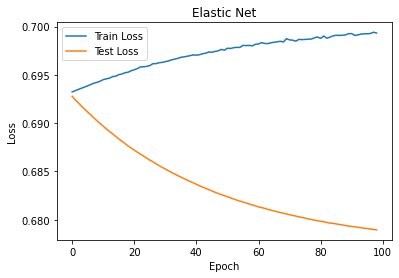

In [68]:
l3__=logregression_regularized(x_test,y_test,l1=2,l2=10,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l3__.fit(x_train, y_train)
l3__.plot()

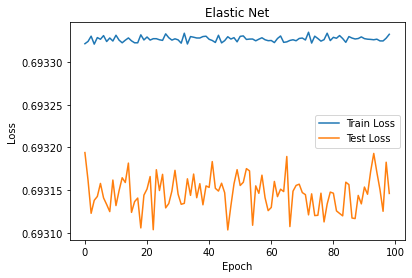

In [67]:
l3___=logregression_regularized(x_test,y_test,l1=10,l2=10,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001)
l3___.fit(x_train, y_train)
l3___.plot()

From the plots of the elastic net, we see that using large lambda1 and lambda 2 are bad. However, with very small lambdas, the losses reduce rather faster and together. Hence, less prone to overfitting.

## In general,

+ It is not good to use too large values for the regularizers.

+ The regularizers make the loss small than without the regularizers if the right regularizer value is used.

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?

1. Why there is no close form for cross-entropy loss

The cross-entropy loss is a non-linear function. So, when we differentiate and equate to zero, the equation becomes equal to zero. Hence, we cannot have a closed form solution.

2. Why we need cross-entropy loss instead of mse?


The cross-entropy loss penalizes the model more when the model makes a misclassification than the MSE.

3. Why is logistic regression a type of classification technique and not a regression?

Logistic regression is a generalized linear model and outputs values in range 0 to 1 or -1 to 1. Also, it uses an activation function to help it in classification.